# General Insurance Data Model

The intention of this module is to allow the generation of artificial insurance policy and claims data based on given (or default) parameters
The data generated can then be used to share demonstrations of new actuarial processes, models and software. While there is really no substitute for real data, this is often commercially sensitive, so this may be the next best thing to help share ideas and solutions within the community.

This is an opensource repository accessible through Github (and a work in progress):
https://github.com/pjdyson/general_insurance_data_model/blob/master/README.md#overview


In [1]:
import general_insurance_claim_model.generators as gt   #The module we are testing
import datetime as dt     # this is for processing dates
import pandas as pd       # table structures used in python
import matplotlib.pyplot as plt

## Example
Below is a short example of how to use the library

### 1. Generate Policy and Claims Data

Next, using the standard settings, create data for three classes of business. By default, this generates 10 years of history, assuming a 3% growth in policy count each year

In [2]:
uw_start_date = dt.datetime.strptime('01/01/2019', '%d/%m/%Y')
data_ultimate_m = gt.generate_ultimate_portfolio(
    class_name='Motor', 
    uw_start_date=uw_start_date)


### 2. Apply a reporting date

The data contains all ultimate information about all policies and claims, so we need to set a reporting date to filter out what we know and what we don't know.

In [3]:
#apply a reporting date to filter out what we don't know yet
reporting_date = dt.datetime.strptime('31/5/2019', '%d/%m/%Y')
data_reported_m = gt.asat_filtering(data_ultimate_m, reporting_date)

### 3. Build Triangles

Just to see what sort of data we have generated, from the policy-claim level data we can build standard actuarial triangles. For this we use the chainladder (python) library

In [5]:
import chainladder as cl


AttributeError: `np.NINF` was removed in the NumPy 2.0 release. Use `-np.inf` instead.

In [14]:

tri_paid = cl.Triangle(data_reported_m, 
                origin='Start_date',
                index='Class_name',
                development='Claim_payment_date',
                columns='Claim_value',
                cumulative=False).incr_to_cum().to_frame().reset_index().melt(id_vars="index", var_name='Development Month', value_name='Paid Value').rename({'index':'Origin Month'}, axis='columns')


AttributeError: `np.NINF` was removed in the NumPy 2.0 release. Use `-np.inf` instead.

### 3. Finally, plot some of the development charts for analysis

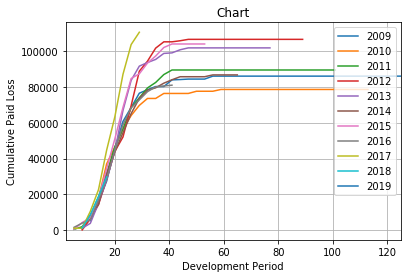

In [14]:
tri_paid[tri_paid['Class_name']=='Motor'].grain('OYDQ').T.plot(
    marker='', grid=True,
    title='Chart').set(
    xlabel='Development Period',
    ylabel='Cumulative Paid Loss')

### Next  . . . 

- You can output the data to csv  . . for reserving or further analysis, etc.

- The triangles are objects compatible with:
    - Chainladder library (in python)
    - SciKit-Learn machine learning library
    
- This module is basic, and needs more options!
